In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import qutip as qt
import numpy as np
from context import *
from numba import njit

In [39]:
state = ghz_state(2)

In [41]:
state.gs

array([[1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

In [42]:
random_map = random_clifford_map(2)

In [43]:
utils.stabilizer_measure(state.gs, state.ps, random_map.gs,random_map.ps,state.r)

(array([[1, 1, 1, 1],
        [0, 1, 0, 1],
        [1, 1, 1, 0],
        [1, 1, 0, 0]]),
 array([2, 0, 0, 0]),
 0,
 array([0, 0, 1, 0]),
 -4.0)

In [44]:
state.gs

array([[1, 1, 1, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 0, 0]])

In [28]:
def pauli2pauli(g,p):
    '''
    g: int (2*N) - an array of pauli string
    p: int - phase indicator
    '''
    tmp = [qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]
    N = np.shape(g)[0]//2
    tmp_list=[]
    for i in range(N):
        if g[2*i]==1&g[2*i+1]==1:
            tmp_list.append(tmp[2])
        elif g[2*i]==1&g[2*i+1]==0:
            tmp_list.append(tmp[1])
        elif g[2*i]==0&g[2*i+1]==1:
            tmp_list.append(tmp[3])
        else:
            tmp_list.append(tmp[0])
    return (1j)**(p)*qt.tensor(tmp_list)

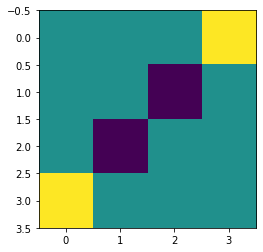

In [47]:
pauli2pauli(np.array())

In [49]:
random_state = qt.Qobj(np.random.randn(2)).unit()

In [55]:
((qt.qeye(2)-qt.sigmay())/2 * random_state).unit()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.62533579-0.33008354j]
 [-0.33008354+0.62533579j]]